In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# by Maximilian Richter

In [2]:
# Step function for the initial conditions
def theta(x):
    if x < 0: return 1
    if x > 0: return 0

In [37]:
def integrate(u_0, time_steps, c, d):
    # Get length of initial value array
    position_steps = len(u_0)
    
    # Allocate matrix for the solution
    u = np.zeros((position_steps, time_steps))

    # Hard coded step size
    dt = 1
    dx = 1

    for n in range(time_steps):
        # Write initial value in solution matrix
        if n == 0: 
            for i in range(position_steps):
                u[i][0]=u_0[i]
        else:
            for i in range(position_steps):
                # Periodic boundary conditions 
                """
                if i==0:
                    u[i][n]=u[-1][n-1]-c*dt/dx*(u[-1][n-1]-u[i-2][n-1])+dt*d*u[-1][n-1]
                elif i==(position_steps-1):
                    u[i][n]=u[0][n-1]-c*dt/dx*(u[0][n-1]-u[i-1][n-1])+dt*d*u[0][n-1]
                """
                if i%position_steps==0:
                    u[i][n]=u[0][n-1]-c*dt/dx*(u[0][n-1]-u[i-1][n-1])+dt*d*u[0][n-1]
                # Step
                else:
                    u[i][n]=u[i][n-1]-c*dt/dx*(u[i][n-1]-u[i-1][n-1])+dt*d*u[i][n-1]
    return u  

In [38]:
# Size of the lattice
position_steps = 64
time_steps = 124

# Make initial values
xmin = -10
xmax = 10
u_0 = np.array([theta(a) for a in np.linspace(xmin, xmax, position_steps)])

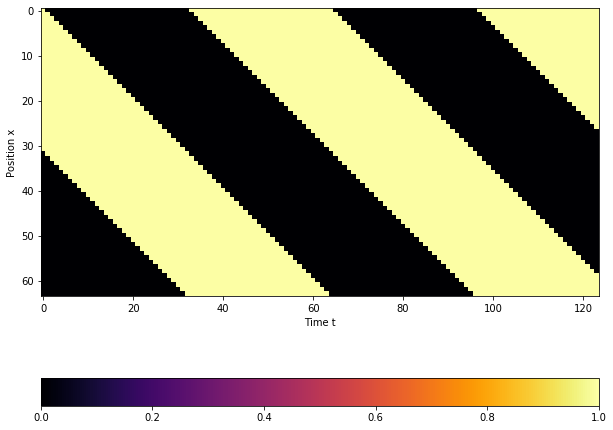

In [39]:
# Control parameter with stable solution
c = 1
d =  0

# Solve PDE and plot result
sol = integrate(u_0, time_steps, c, d)
fig,ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(sol, cmap="inferno")
ax.set_xlabel("Time t")
ax.set_ylabel("Position x")
fig.colorbar(im, orientation="horizontal")

Text(0, 0.5, 'u')

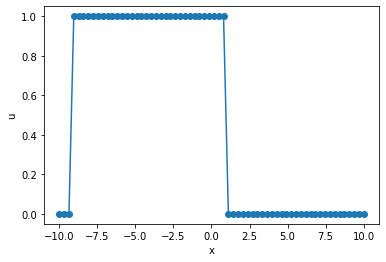

In [6]:
plt.plot(np.linspace(-10,10,position_steps), sol[:,-1], "o-")
plt.xlabel("x")
plt.ylabel("u")

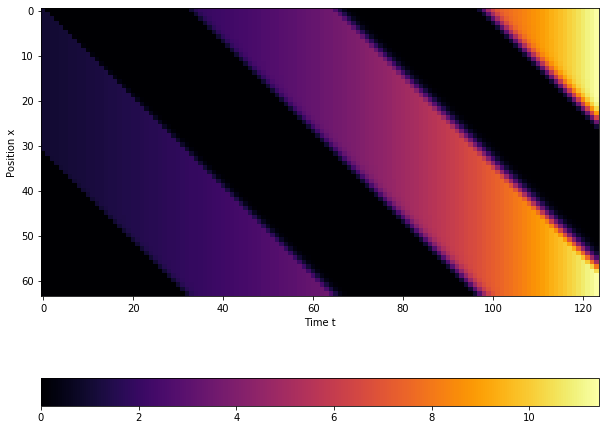

In [40]:
# Control parameter with stable solution and diffusion
c = 1
d =  0.02

# Solve PDE and plot result
sol = integrate(u_0, time_steps, c, d)
fig,ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(sol, cmap="inferno")
ax.set_xlabel("Time t")
ax.set_ylabel("Position x")
fig.colorbar(im, orientation="horizontal")

Text(0, 0.5, 'u')

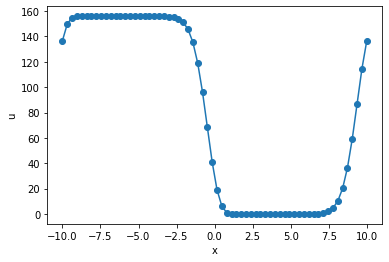

In [8]:
plt.plot(np.linspace(-10,10,position_steps), sol[:,-1], "o-")
plt.xlabel("x")
plt.ylabel("u")

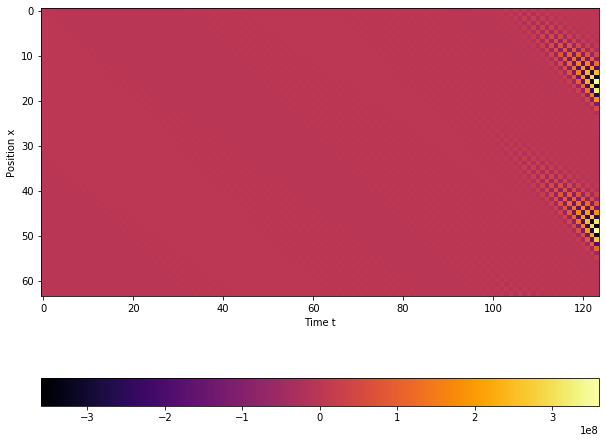

In [41]:
# Control parameter with unstable solution
c = 1.1
d =  0

# Solve PDEand plot result
sol = integrate(u_0, time_steps, c, d)
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sol, cmap="inferno")
ax.set_xlabel("Time t")
ax.set_ylabel("Position x")
fig.colorbar(im, orientation="horizontal")

In [42]:
plt.plot(np.linspace(-10,10,position_steps), sol[:,127])
plt.xlabel("x")
plt.ylabel("u")

IndexError: index 127 is out of bounds for axis 1 with size 124

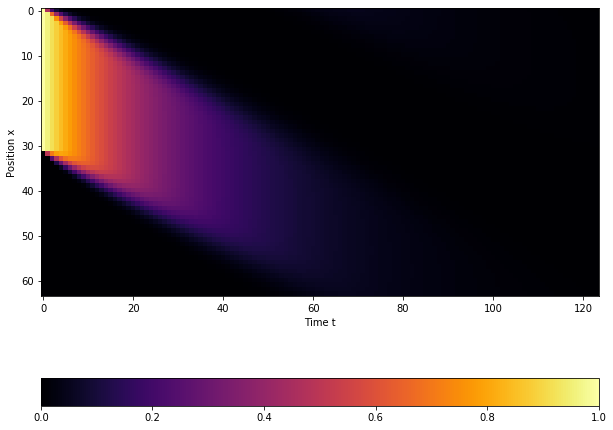

In [45]:
# Control parameter with c<0
c = 0.5
d =  -0.04

# Solve PDE and plot result
sol = integrate(u_0, time_steps, c, d)
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sol, cmap="inferno")
ax.set_xlabel("Time t")
ax.set_ylabel("Position x")
fig.colorbar(im, orientation="horizontal")

Text(0, 0.5, 'u')

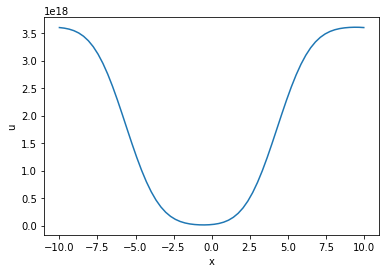

In [32]:
plt.plot(np.linspace(-10,10,position_steps), sol[:,127])
plt.xlabel("x")
plt.ylabel("u")